In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cascade-train-dataset/train_age_dataset.csv


In [4]:
data=pd.read_csv('/kaggle/input/cascade-train-dataset/train_age_dataset.csv')
data.head()

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group
0,265153,48958844,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.200000,0.0,0.041667,0.025000,0.0,0.000000,0.175000,0.033333,0.0,1
1,405231,51100441,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.093220,0.0,0.012712,0.018644,0.0,0.084746,0.000000,0.033898,82.5,2
2,57867,6887426,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.002786,0.0,0.000000,0.000557,0.0,0.002786,0.000000,0.000000,0.0,1
3,272618,50742404,2,1,0.0,0.0,0.0,0,0.0,0.0,...,0.008403,0.0,0.000000,0.001681,0.0,0.000000,0.000000,0.008403,0.0,1
4,251123,45589200,2,2,0.0,0.0,0.0,0,0.0,0.0,...,0.204918,0.0,0.000000,0.049180,0.0,0.008197,0.057377,0.180328,0.0,1


In [5]:
data.isnull().sum()

Unnamed: 0                         0
userId                             0
tier                               0
gender                             0
following_rate                     0
followers_avg_age                  0
following_avg_age                  0
max_repetitive_punc                0
num_of_hashtags_per_action         0
emoji_count_per_action             0
punctuations_per_action            0
number_of_words_per_action         0
avgCompletion                      0
avgTimeSpent                       0
avgDuration                        0
avgComments                        0
creations                          0
content_views                      0
num_of_comments                    0
weekends_trails_watched_per_day    0
weekdays_trails_watched_per_day    0
slot1_trails_watched_per_day       0
slot2_trails_watched_per_day       0
slot3_trails_watched_per_day       0
slot4_trails_watched_per_day       0
avgt2                              0
age_group                          0
d

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488877 entries, 0 to 488876
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       488877 non-null  int64  
 1   userId                           488877 non-null  int64  
 2   tier                             488877 non-null  int64  
 3   gender                           488877 non-null  int64  
 4   following_rate                   488877 non-null  float64
 5   followers_avg_age                488877 non-null  float64
 6   following_avg_age                488877 non-null  float64
 7   max_repetitive_punc              488877 non-null  int64  
 8   num_of_hashtags_per_action       488877 non-null  float64
 9   emoji_count_per_action           488877 non-null  float64
 10  punctuations_per_action          488877 non-null  float64
 11  number_of_words_per_action       488877 non-null  float64
 12  av

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data1=data.copy()
temp=data1.drop(['userId','tier','age_group','Unnamed: 0'],axis=1,inplace=True)
temp=data1.groupby('gender').sum()
temp

,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
gender,,,,,,,,,,,,,,,,,,,,,
1,34963.008557,138707.993147,162226.122425,268486,107.992111,309.597456,4662.860940,69288.736311,129095.752460,1.265185e+07,...,6328.399935,142813.516046,728.720237,26830.745379,24302.523212,12148.369794,52837.462488,52450.137058,57738.642711,6.689399e+07
2,5238.848983,31186.423587,34815.222098,93160,27.521878,170.176430,1597.244738,18292.421980,37895.810373,4.050838e+07,...,2014.364180,48343.698993,253.241489,9518.616401,8416.652855,3913.532023,16438.964022,21077.395025,19690.725973,1.365621e+07


In [9]:
data2=data.copy()
temp1=data2.drop(['userId','gender','age_group','Unnamed: 0'],axis=1,inplace=True)
temp1=data2.groupby('tier').sum()
temp1

,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,...,creations,content_views,num_of_comments,weekends_trails_watched_per_day,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2
tier,,,,,,,,,,,,,,,,,,,,,
1,13807.849257,36443.831794,41624.681592,82057,25.697860,61.439166,901.745340,18229.389792,17351.330010,3.960957e+07,...,2405.443700,31170.705568,316.886694,6287.571181,5982.359942,3059.881153,11608.445111,13424.897669,14393.812356,1.699535e+07
2,23088.358821,115600.688678,134563.185699,242766,96.404680,366.319942,4661.601628,60527.007081,136628.935772,1.281292e+07,...,5193.382326,147042.035264,593.276601,27619.247957,24451.946031,11955.480109,52861.283742,55043.827131,57638.150068,5.533984e+07
3,3305.649462,17849.896262,20853.477232,36823,13.411449,52.014777,696.758710,8824.761418,13011.297052,7.377435e+05,...,743.938090,12944.474207,71.798430,2442.542643,2284.870093,1046.540556,4806.697656,5058.807283,5397.406259,8.215011e+06


In [10]:
data.shape

(488877, 27)

In [11]:
data=data.sample(frac=1).reset_index(drop=True)

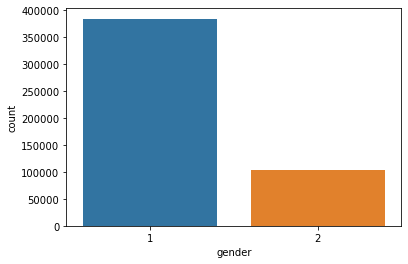

In [12]:
sns.countplot('gender',data=data)

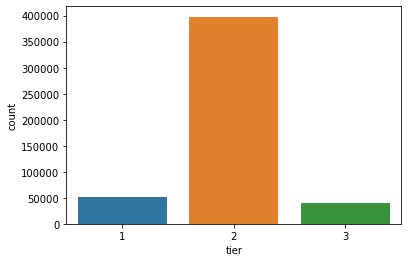

In [13]:
sns.countplot('tier',data=data)

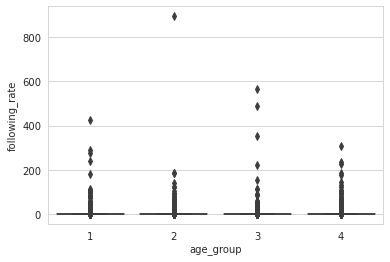

In [14]:
sns.set_style("whitegrid") 
  
sns.boxplot(x = 'age_group', y = 'following_rate', data = data) 


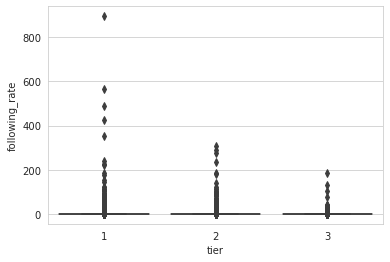

In [15]:
sns.boxplot(x = 'tier', y = 'following_rate', data = data) 

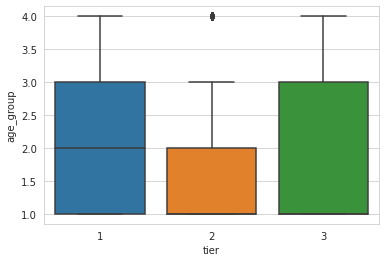

In [16]:
sns.boxplot(x = 'tier', y = 'age_group', data = data) 

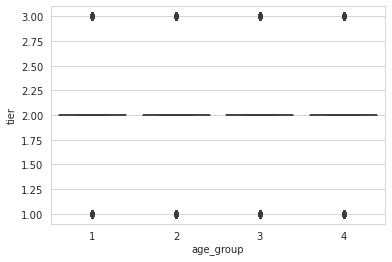

In [17]:
sns.boxplot(x = 'age_group', y = 'tier', data = data) 

In [18]:
data['avgComments'].value_counts()

0      444635
1       25649
2        8061
3        3455
4        1840
        ...  
130         1
128         1
124         1
122         1
252         1
Name: avgComments, Length: 186, dtype: int64

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
enc = OneHotEncoder(handle_unknown='ignore')

In [21]:
enc_df = pd.DataFrame(enc.fit_transform(data[['tier']]).toarray())

data = data.join(enc_df)
data

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group,0,1,2
0,72034,43662102,2,1,0.000000,0.00,0.000,0,0.0,0.0,...,0.203252,0.000000,0.406504,0.349593,0.260163,0.000000,1,0.0,1.0,0.0
1,116799,42792798,2,2,0.000000,0.00,0.000,0,0.0,0.0,...,0.055285,0.000000,0.000000,0.276423,0.000000,179.000000,1,0.0,1.0,0.0
2,407461,33574147,2,2,0.000000,0.00,0.000,3,0.0,0.0,...,0.138583,0.000000,0.007874,0.574803,0.110236,185.355556,4,0.0,1.0,0.0
3,3987,34772160,1,1,0.000000,0.00,0.000,0,0.0,0.0,...,0.001587,0.000000,0.007937,0.000000,0.000000,0.000000,1,1.0,0.0,0.0
4,417925,35285283,2,2,0.015873,0.00,0.000,0,0.0,0.0,...,0.028571,0.000000,0.023810,0.119048,0.000000,174.000000,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488872,309751,57961057,2,1,0.000000,0.00,0.000,0,0.0,0.0,...,0.000000,0.000000,0.000000,0.495146,0.000000,0.000000,1,0.0,1.0,0.0
488873,155587,1718048,3,1,0.001792,2.75,3.000,0,0.0,0.0,...,0.007885,0.000000,0.034050,0.003584,0.016129,186.603053,2,0.0,0.0,1.0
488874,267715,49593650,2,1,0.000000,0.00,0.000,0,0.0,0.0,...,0.195000,0.000000,0.858333,0.000000,0.116667,0.000000,1,0.0,1.0,0.0
488875,528086,37192038,2,1,0.072000,1.25,2.375,0,0.0,0.0,...,0.000000,0.000000,0.080000,0.000000,0.000000,93.000000,4,0.0,1.0,0.0


In [22]:
data.columns

Index([                     'Unnamed: 0',                          'userId',
                                  'tier',                          'gender',
                        'following_rate',               'followers_avg_age',
                     'following_avg_age',             'max_repetitive_punc',
            'num_of_hashtags_per_action',          'emoji_count_per_action',
               'punctuations_per_action',      'number_of_words_per_action',
                         'avgCompletion',                    'avgTimeSpent',
                           'avgDuration',                     'avgComments',
                             'creations',                   'content_views',
                       'num_of_comments', 'weekends_trails_watched_per_day',
       'weekdays_trails_watched_per_day',    'slot1_trails_watched_per_day',
          'slot2_trails_watched_per_day',    'slot3_trails_watched_per_day',
          'slot4_trails_watched_per_day',                           'avgt2',

In [23]:
data = data.rename(columns={0: 'tier_1', 1: 'tier_2',2:'tier_3' })
data

,Unnamed: 0,userId,tier,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,...,weekdays_trails_watched_per_day,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group,tier_1,tier_2,tier_3
0,72034,43662102,2,1,0.000000,0.00,0.000,0,0.0,0.0,...,0.203252,0.000000,0.406504,0.349593,0.260163,0.000000,1,0.0,1.0,0.0
1,116799,42792798,2,2,0.000000,0.00,0.000,0,0.0,0.0,...,0.055285,0.000000,0.000000,0.276423,0.000000,179.000000,1,0.0,1.0,0.0
2,407461,33574147,2,2,0.000000,0.00,0.000,3,0.0,0.0,...,0.138583,0.000000,0.007874,0.574803,0.110236,185.355556,4,0.0,1.0,0.0
3,3987,34772160,1,1,0.000000,0.00,0.000,0,0.0,0.0,...,0.001587,0.000000,0.007937,0.000000,0.000000,0.000000,1,1.0,0.0,0.0
4,417925,35285283,2,2,0.015873,0.00,0.000,0,0.0,0.0,...,0.028571,0.000000,0.023810,0.119048,0.000000,174.000000,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488872,309751,57961057,2,1,0.000000,0.00,0.000,0,0.0,0.0,...,0.000000,0.000000,0.000000,0.495146,0.000000,0.000000,1,0.0,1.0,0.0
488873,155587,1718048,3,1,0.001792,2.75,3.000,0,0.0,0.0,...,0.007885,0.000000,0.034050,0.003584,0.016129,186.603053,2,0.0,0.0,1.0
488874,267715,49593650,2,1,0.000000,0.00,0.000,0,0.0,0.0,...,0.195000,0.000000,0.858333,0.000000,0.116667,0.000000,1,0.0,1.0,0.0
488875,528086,37192038,2,1,0.072000,1.25,2.375,0,0.0,0.0,...,0.000000,0.000000,0.080000,0.000000,0.000000,93.000000,4,0.0,1.0,0.0


In [24]:
data.drop(['userId','tier','Unnamed: 0'],axis=1,inplace=True)

In [25]:
enc_df1 = pd.DataFrame(enc.fit_transform(data[['gender']]).toarray())

data = data.join(enc_df1)
data

,gender,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,...,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group,tier_1,tier_2,tier_3,0,1
0,1,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.000000,0.558042,...,0.406504,0.349593,0.260163,0.000000,1,0.0,1.0,0.0,1.0,0.0
1,2,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.057143,0.349037,...,0.000000,0.276423,0.000000,179.000000,1,0.0,1.0,0.0,0.0,1.0
2,2,0.000000,0.00,0.000,3,0.0,0.0,0.0,0.836364,0.114811,...,0.007874,0.574803,0.110236,185.355556,4,0.0,1.0,0.0,0.0,1.0
3,1,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.000000,0.068815,...,0.007937,0.000000,0.000000,0.000000,1,1.0,0.0,0.0,1.0,0.0
4,2,0.015873,0.00,0.000,0,0.0,0.0,0.0,0.157895,0.246751,...,0.023810,0.119048,0.000000,174.000000,1,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488872,1,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.000000,0.305810,...,0.000000,0.495146,0.000000,0.000000,1,0.0,1.0,0.0,1.0,0.0
488873,1,0.001792,2.75,3.000,0,0.0,0.0,0.0,0.012500,0.113566,...,0.034050,0.003584,0.016129,186.603053,2,0.0,0.0,1.0,1.0,0.0
488874,1,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.008547,0.593364,...,0.858333,0.000000,0.116667,0.000000,1,0.0,1.0,0.0,1.0,0.0
488875,1,0.072000,1.25,2.375,0,0.0,0.0,0.0,0.100000,0.221953,...,0.080000,0.000000,0.000000,93.000000,4,0.0,1.0,0.0,1.0,0.0


In [26]:
data = data.rename(columns={0: 'gender_male', 1: 'gender_female' })
data.drop(['gender'],axis=1,inplace=True)
data

,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,...,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,age_group,tier_1,tier_2,tier_3,gender_male,gender_female
0,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.000000,0.558042,7.736000,...,0.406504,0.349593,0.260163,0.000000,1,0.0,1.0,0.0,1.0,0.0
1,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.057143,0.349037,26.058824,...,0.000000,0.276423,0.000000,179.000000,1,0.0,1.0,0.0,0.0,1.0
2,0.000000,0.00,0.000,3,0.0,0.0,0.0,0.836364,0.114811,5.090909,...,0.007874,0.574803,0.110236,185.355556,4,0.0,1.0,0.0,0.0,1.0
3,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.000000,0.068815,22.000000,...,0.007937,0.000000,0.000000,0.000000,1,1.0,0.0,0.0,1.0,0.0
4,0.015873,0.00,0.000,0,0.0,0.0,0.0,0.157895,0.246751,4.388889,...,0.023810,0.119048,0.000000,174.000000,1,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488872,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.000000,0.305810,8.764706,...,0.000000,0.495146,0.000000,0.000000,1,0.0,1.0,0.0,1.0,0.0
488873,0.001792,2.75,3.000,0,0.0,0.0,0.0,0.012500,0.113566,7.900000,...,0.034050,0.003584,0.016129,186.603053,2,0.0,0.0,1.0,1.0,0.0
488874,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.008547,0.593364,42.179487,...,0.858333,0.000000,0.116667,0.000000,1,0.0,1.0,0.0,1.0,0.0
488875,0.072000,1.25,2.375,0,0.0,0.0,0.0,0.100000,0.221953,5.800000,...,0.080000,0.000000,0.000000,93.000000,4,0.0,1.0,0.0,1.0,0.0


In [27]:
X=data.drop(['age_group'],axis=1)
y=data['age_group']

In [28]:
X

,following_rate,followers_avg_age,following_avg_age,max_repetitive_punc,num_of_hashtags_per_action,emoji_count_per_action,punctuations_per_action,number_of_words_per_action,avgCompletion,avgTimeSpent,...,slot1_trails_watched_per_day,slot2_trails_watched_per_day,slot3_trails_watched_per_day,slot4_trails_watched_per_day,avgt2,tier_1,tier_2,tier_3,gender_male,gender_female
0,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.000000,0.558042,7.736000,...,0.000000,0.406504,0.349593,0.260163,0.000000,0.0,1.0,0.0,1.0,0.0
1,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.057143,0.349037,26.058824,...,0.000000,0.000000,0.276423,0.000000,179.000000,0.0,1.0,0.0,0.0,1.0
2,0.000000,0.00,0.000,3,0.0,0.0,0.0,0.836364,0.114811,5.090909,...,0.000000,0.007874,0.574803,0.110236,185.355556,0.0,1.0,0.0,0.0,1.0
3,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.000000,0.068815,22.000000,...,0.000000,0.007937,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0
4,0.015873,0.00,0.000,0,0.0,0.0,0.0,0.157895,0.246751,4.388889,...,0.000000,0.023810,0.119048,0.000000,174.000000,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488872,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.000000,0.305810,8.764706,...,0.000000,0.000000,0.495146,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0
488873,0.001792,2.75,3.000,0,0.0,0.0,0.0,0.012500,0.113566,7.900000,...,0.000000,0.034050,0.003584,0.016129,186.603053,0.0,0.0,1.0,1.0,0.0
488874,0.000000,0.00,0.000,0,0.0,0.0,0.0,0.008547,0.593364,42.179487,...,0.000000,0.858333,0.000000,0.116667,0.000000,0.0,1.0,0.0,1.0,0.0
488875,0.072000,1.25,2.375,0,0.0,0.0,0.0,0.100000,0.221953,5.800000,...,0.000000,0.080000,0.000000,0.000000,93.000000,0.0,1.0,0.0,1.0,0.0


In [29]:
data.shape[1]

28

In [30]:
from xgboost import XGBClassifier

In [31]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [32]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=.06,random_state=42)

In [ ]:
model = XGBClassifier(learning_rate=0.025, max_depth=25, subsample = 0.9, n_estimators=1000,objective='multi:softmax', num_class = 4)
model.fit(train_x,train_y)

In [ ]:
model.score(train_x,train_y)

In [ ]:
model.score(test_x,test_y)